# Bank Marketing


The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

The goal is to compare the performance of the classifiers (k-nearest neighbors, logistic regression, decision trees, and support vector machines) using this dataset.


In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import polynomial_kernel, rbf_kernel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import Pipeline



from ucimlrepo import fetch_ucirepo 

### Loading data

In [83]:
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 

# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets

### Data cleaning

Checking if there is any null values in the dataset

In [84]:
null_indices = X.isnull().any(axis=1)

In [85]:
y = y[~null_indices]

In [86]:
X = X.dropna()

In [87]:
X.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day_of_week    0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
dtype: int64

In [88]:
y.isnull().sum()

y    0
dtype: int64

In [89]:
X['job'] = X['job'] .str.replace('admin.', 'admin')
X['job'] = X['job'] .str.replace('self-employed', 'selfEmployed')
X['job'] = X['job'] .str.replace('blue-collar', 'blueCollar')

C:\Users\m_kha\AppData\Local\Temp\ipykernel_19912\2485778615.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  X['job'] = X['job'] .str.replace('admin.', 'admin')
C:\Users\m_kha\AppData\Local\Temp\ipykernel_19912\2485778615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['job'] = X['job'] .str.replace('admin.', 'admin')
C:\Users\m_kha\AppData\Local\Temp\ipykernel_19912\2485778615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['job'] = X['job']

### Splitting data into training and validation sets

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [91]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7842 entries, 24060 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          7842 non-null   int64 
 1   job          7842 non-null   object
 2   marital      7842 non-null   object
 3   education    7842 non-null   object
 4   default      7842 non-null   object
 5   balance      7842 non-null   int64 
 6   housing      7842 non-null   object
 7   loan         7842 non-null   object
 8   contact      7842 non-null   object
 9   day_of_week  7842 non-null   int64 
 10  month        7842 non-null   object
 11  duration     7842 non-null   int64 
 12  campaign     7842 non-null   int64 
 13  pdays        7842 non-null   int64 
 14  previous     7842 non-null   int64 
 15  poutcome     7842 non-null   object
dtypes: int64(7), object(9)
memory usage: 1.0+ MB


In [92]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
24060,33,admin,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure
24062,42,admin,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure


object

### Data transformation:

Create separate transformers for numeric and categorical features. For numeric, we scale the data. For categorical, we apply OneHot encoding


In [94]:
# Create separate transformers for numeric and categorical features
numeric_features = make_column_selector(dtype_include=int) # List of numeric feature column names
categorical_features = make_column_selector(dtype_include=object) # List of categorical feature column names

transformer = make_column_transformer((OneHotEncoder(drop = 'first'), categorical_features),
                                     remainder = StandardScaler())

### Data Modeling and Evaluation

We considered 4 models:
- Knearest Neighbor
- Decision Tree
- Logistic Regression 
- SVM

We used accuaracy for training and test sets as evaluation metrics


In [166]:
## Modol #1: Logistic Regression 

%time
logistic_pipe = Pipeline([('transformer', transformer),
                    ('lgr', LogisticRegression(random_state=42, max_iter = 1000))])

logistic_pipe.fit(X_train, y_train)

logistic_pipe_train_acc = logistic_pipe.score(X_train, y_train)
logistic_pipe_test_acc = logistic_pipe.score(X_test, y_test)

print (logistic_pipe_train_acc, logistic_pipe_test_acc)

CPU times: total: 0 ns
Wall time: 0 ns
0.8456044890324774 0.8322284548699643


C:\Users\m_kha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [142]:
## Modol #2:  K-nearest Neighbor

%time
knn_pipe = Pipeline([('transformer', transformer),
                    ('knn', KNeighborsClassifier(n_neighbors=3))])

knn_pipe.fit(X_train, y_train)

knn_pipe_train_acc = knn_pipe.score(X_train, y_train)
knn_pipe_test_acc = knn_pipe.score(X_test, y_test)

print (knn_pipe_train_acc, knn_pipe_test_acc)

CPU times: total: 0 ns
Wall time: 0 ns
90% 80%


C:\Users\m_kha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [167]:
## Modol #3:  Decision Tree


%time
tree_pipe = Pipeline([('transformer', transformer),
                    ('tree', DecisionTreeClassifier(random_state = 42))])

tree_pipe.fit(X_train, y_train)

tree_pipe_train_acc = tree_pipe.score(X_train, y_train)
tree_pipe_test_acc = tree_pipe.score(X_test, y_test)

print (tree_pipe_train_acc, tree_pipe_test_acc)

CPU times: total: 0 ns
Wall time: 0 ns
1.0 0.8067312595614482


In [168]:
## Modol #4:  SVM

%time
svc_pipe = Pipeline([('transformer', transformer),
                    ('svc', SVC())])

svc_pipe.fit(X_train, y_train)

svc_pipe_train_acc = svc_pipe.score(X_train, y_train)
svc_pipe_test_acc = svc_pipe.score(X_test, y_test)

print (svc_pipe_train_acc, svc_pipe_test_acc)

CPU times: total: 0 ns
Wall time: 0 ns


C:\Users\m_kha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8853936405373236 0.8403875573686894


In [169]:
res_dict = {'model': ['KNN', 'Logistic Regression','Tree', 'SVC'],
           'train_score': [knn_pipe_train_acc, logistic_pipe_train_acc, tree_pipe_train_acc,svc_pipe_train_acc ],
           'test_score': [knn_pipe_test_acc, logistic_pipe_test_acc,tree_pipe_test_acc,svc_pipe_test_acc]}
df = pd.DataFrame(res_dict)#.set_index('model')

In [170]:
df

,model,train_score,test_score
0,KNN,90%,80%
1,Logistic Regression,0.845604,0.832228
2,Tree,1.0,0.806731
3,SVC,0.885394,0.840388


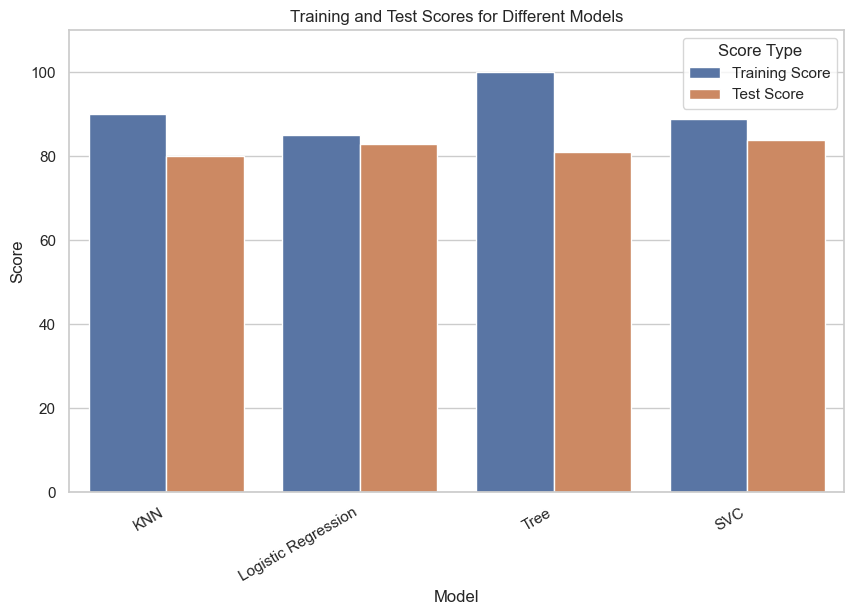

In [175]:
# Set the style of the plot
sns.set(style="whitegrid")

# Melt the DataFrame to combine training and test scores into a single column
df_melted = df.melt(id_vars='model', var_name='score_type', value_name='score')

# Create a bar plot
plt.figure(figsize=(10, 6)
)
ax = sns.barplot(x='model', y='score', hue='score_type', data=df_melted)
plt.title('Training and Test Scores for Different Models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0, 110)  # Set the y-axis limit
plt.xticks(rotation=30, ha='right')

# Customize the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['Training Score', 'Test Score'], title='Score Type')

# Show the combined plot
plt.show()

## Conclusion:

Based on accuracy on the validation set, SVC model outperformed all other models.